In [39]:
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import numpy as np
import pickle
import seaborn as sns

In [2]:
BASE_DIR = '/Users/michelameister/Documents/research/tansey/msk_intern/pyro_model/results/2023-07-28'
train_fn = BASE_DIR + '/train_avg.pkl'
test_fn = BASE_DIR + '/test_avg.pkl'

In [3]:
def read_pickle(fn):
    with open(fn, 'rb') as f:
        v = pickle.load(f)
    return v

In [5]:
train = read_pickle(train_fn)
test = read_pickle(test_fn)

# read in arrays from read_train, read_test
# get min, max values for heatmap
# plot train heatmap
# plot test heatmap
# plot train - test
# save train, test to same pdf file; as well as individual image files

In [21]:
train_mask = train != -np.inf
test_mask = test != -np.inf
assert (train_mask == test_mask).all()
# find min across train and test
min_val = np.min(np.array(np.min(train[train_mask]), np.min(test[test_mask])))
# find max across train and test
max_val = np.max(np.array(np.max(train[train_mask]), np.max(test[test_mask])))

In [29]:
vmax = max_val + .01
vmin = min_val - .01
train[~train_mask] = vmin
test[~test_mask] = vmin

In [30]:
assert train.shape == test.shape
n_rows = train.shape[0]
n_cols = train.shape[1]
row_ticks = range(1, n_rows + 1)
col_ticks = range(1, n_cols + 1)

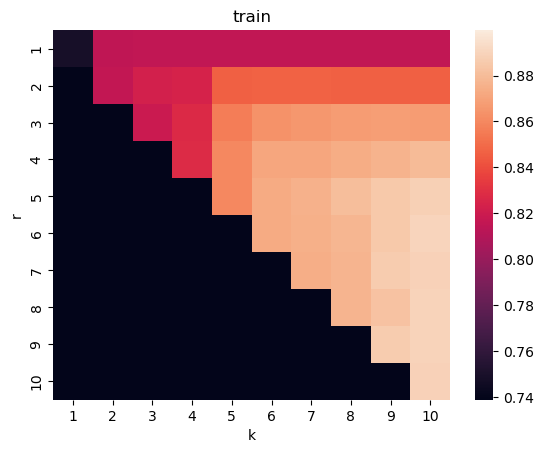

In [35]:
# Plot train
train_fig = plt.figure()
plt.title("train")
ax = sns.heatmap(train, vmin=vmin, vmax=vmax, yticklabels=row_ticks, xticklabels=col_ticks)
ax.set(xlabel='k', ylabel='r')
plt.savefig(write_train)
plt.show()

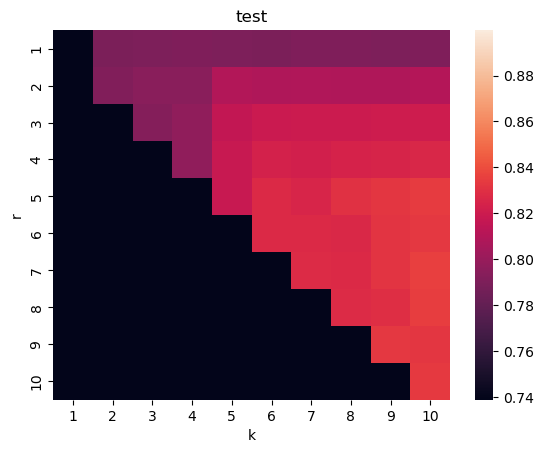

In [36]:
# Plot test
test_fig = plt.figure()
plt.title("test")
ax = sns.heatmap(test, vmin=vmin, vmax=vmax, yticklabels=row_ticks, xticklabels=col_ticks)
ax.set(xlabel='k', ylabel='r')
plt.savefig(write_test)
plt.show()

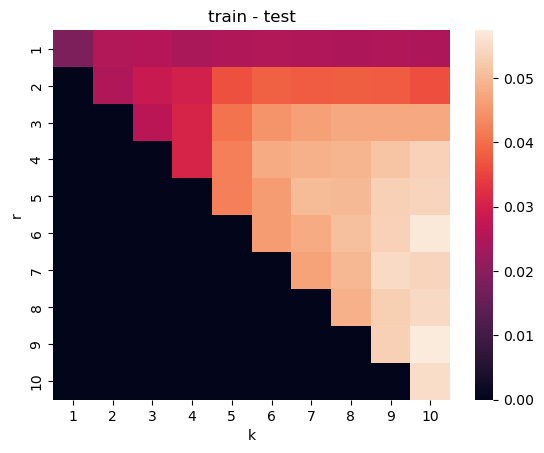

In [37]:
# Plot difference
diff = train - test
diff_fig = plt.figure()
plt.title("train - test")
ax = sns.heatmap(diff, yticklabels=row_ticks, xticklabels=col_ticks)
ax.set(xlabel='k', ylabel='r')
plt.savefig(write_diff)
plt.show()

In [38]:
# save all 3 figures to single pdf 
# train_test_fn is file to save results to!
pdf = matplotlib.backends.backend_pdf.PdfPages(train_test_fn)
for fig in [train_fig, test_fig, diff_fig]: ## will open an empty extra figure :(
    pdf.savefig(fig)
pdf.close()

In [40]:
def save_figs_to_pdf(fig_list, write_fn):
    pdf = matplotlib.backends.backend_pdf.PdfPages(write_fn)
    for fig in fig_list:
        pdf.savefig(fig)
    pdf.close()

In [58]:
def plot_train_vs_test(train_vals, test_vals, title, x_axis, x_label, y_min, y_max):
    assert len(train_vals) == len(test_vals)
    fig = plt.figure()
    ax = plt.gca()
    ax.set_ylim([y_min, y_max])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('pearson correlation')
    plt.plot(x_axis, train_vals, 'b-o', label='train')
    plt.plot(x_axis, test_vals, 'r-o', label='test')
    plt.legend()
    return fig

def plot_fixed_r(write_fn, train, test, max_k, n_seeds, n_restarts, y_min, y_max):
    assert train.shape == test.shape
    fig_list = []
    for i in range(0, train.shape[0]):
        train_vals = train[i, i:]
        test_vals = test[i, i:]
        r = i + 1
        x_axis = range(r, max_k + 1)
        x_label = 'k (source dimension)'
        title = 'fixing transfer dimension r = ' + str(r) + '\n'
        title += 'ea. datapoint averages ' + str(n_seeds) + ' seeds, ea. w/ ' + str(n_restarts) \
        + ' model restarts (kept max value)'
        f = plot_train_vs_test(train_vals, test_vals, title, x_axis, x_label, y_min, y_max)
        fig_list.append(f)
    save_figs_to_pdf(fig_list, write_fn)

def plot_fixed_k(write_fn, train, test, n_seeds, n_restarts, y_min, y_max):
    assert train.shape == test.shape
    fig_list = []
    for j in range(0, train.shape[1]):
        train_vals = train[0:j+1, j]
        test_vals = test[0:j+1, j]
        k = j + 1
        x_axis = range(1, k + 1)
        x_label = 'r (transfer dimension)'
        title = 'fixing source dimension k = ' + str(k) + '\n'
        title += 'ea. datapoint averages ' + str(n_seeds) + ' seeds, ea. w/ ' + str(n_restarts) \
        + ' model restarts (kept max value)'
        f = plot_train_vs_test(train_vals, test_vals, title, x_axis, x_label, y_min, y_max)
        fig_list.append(f)
    save_figs_to_pdf(fig_list, write_fn)

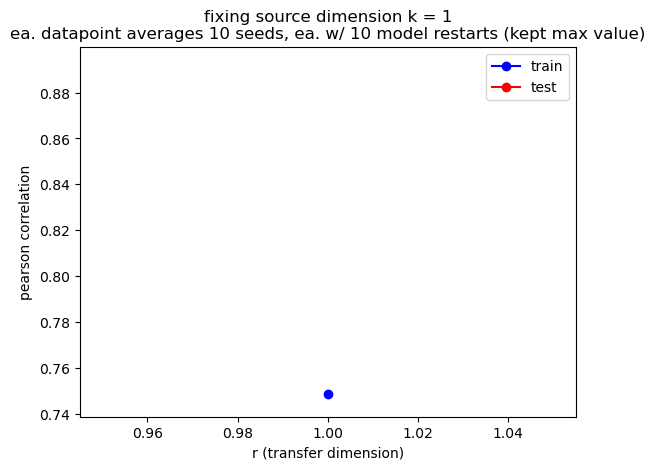

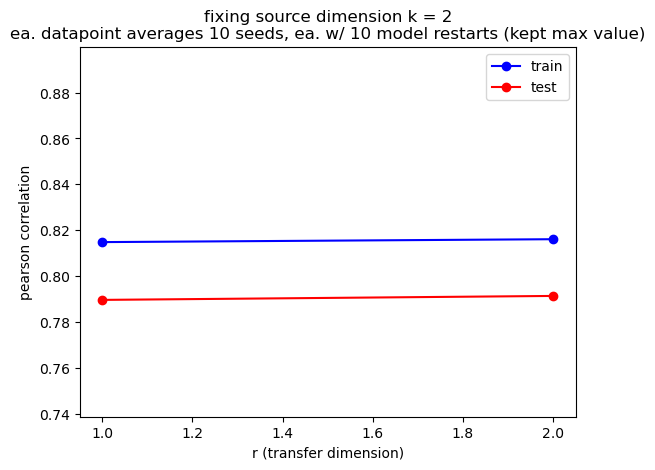

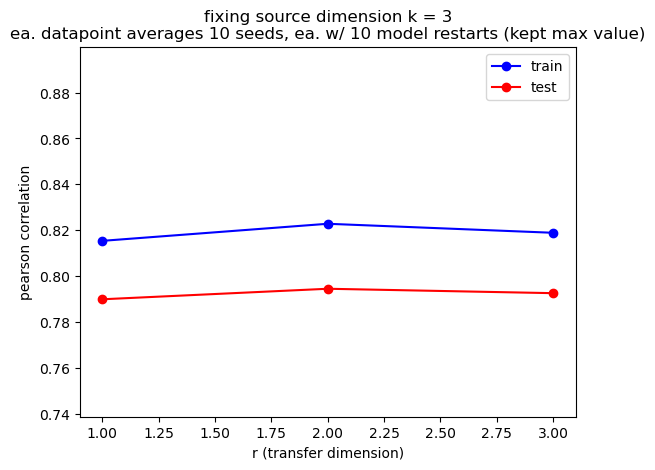

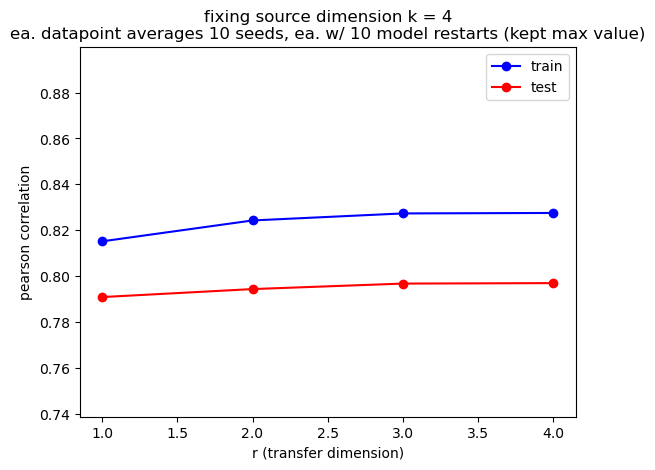

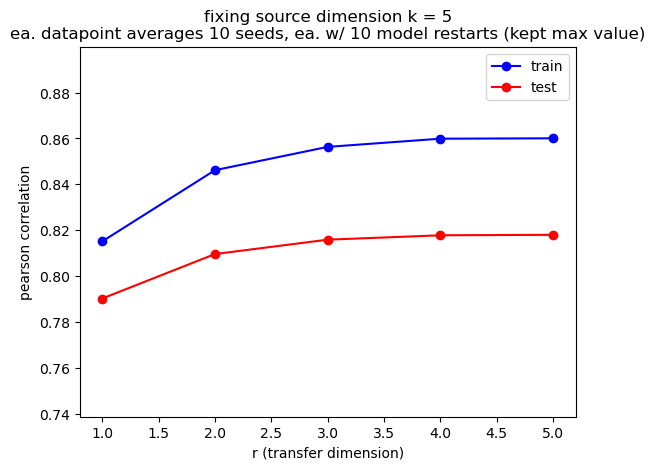

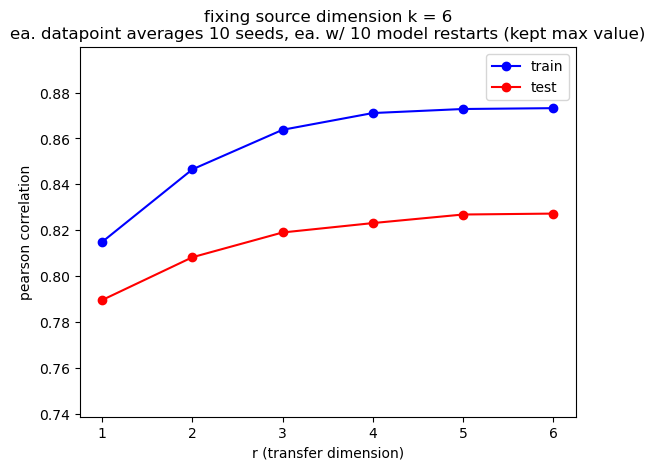

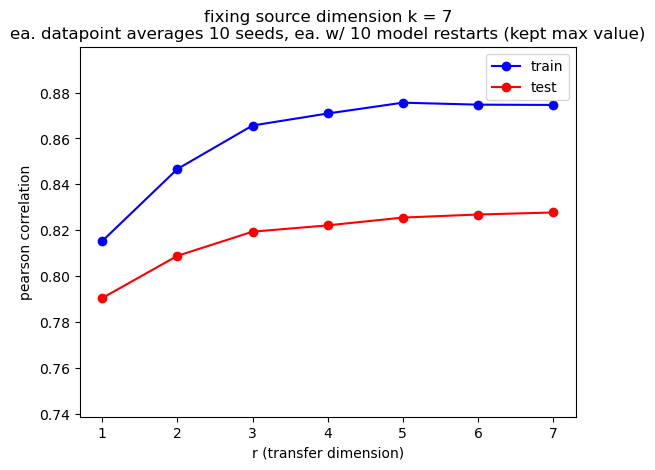

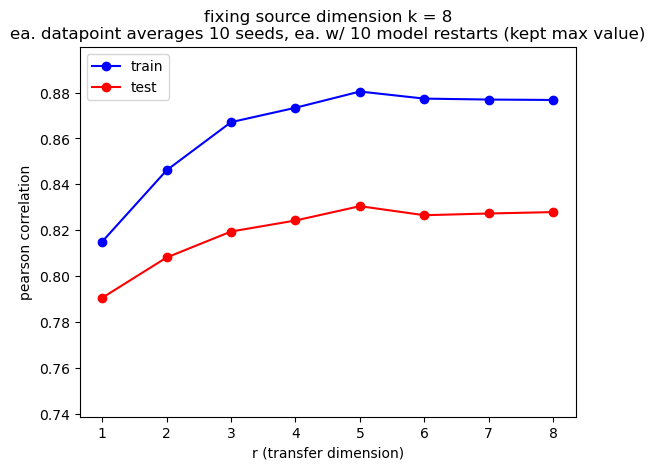

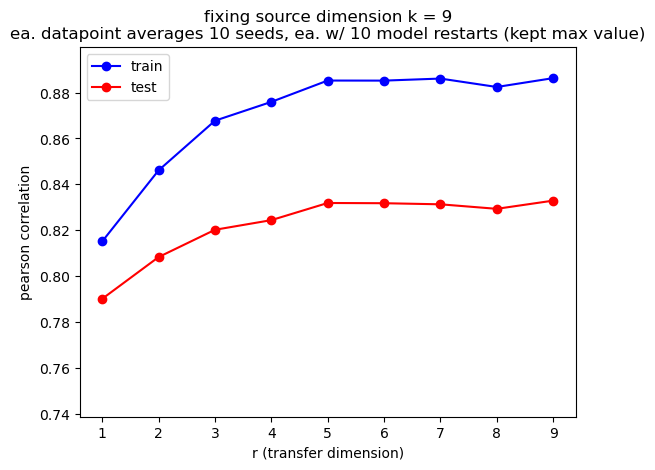

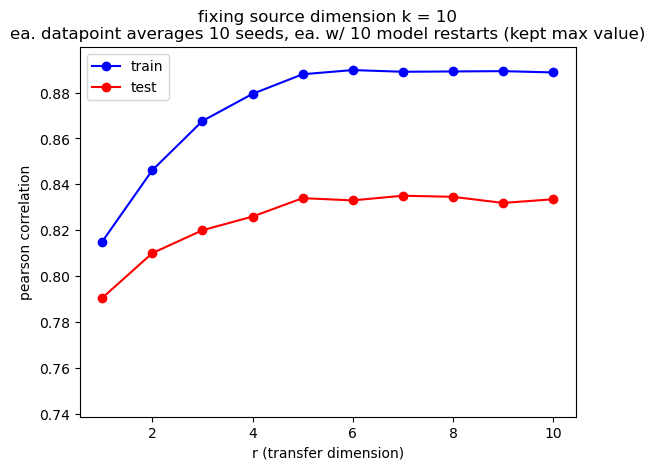

In [59]:
max_k = 10
n_seeds = 10
n_restarts = 10
write_fn = "output_practice.pdf"
#plot_fixed_r(train, test, max_k, n_seeds, n_restarts, write_fn)
plot_fixed_k(write_fn, train, test, n_seeds, n_restarts, vmin, vmax)